# Desafio Murano Investimentos

# André Luiz Rosário de Azevedo

In [1]:
# Desafio Murano Investimentos

# André Luiz Rosário de Azevedo

In [1]:
## importando bibliotecas necessárias

import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Questão 1

perguntar se o tipo das variaveis é sempre int, ou se muda -> variaveis numéricas

In [180]:
## Questão 1
# Apenas variaveis numericas (int ou float)

def change_variables(a, b):
    print(f'Antes de executar a funcao: a = {a}, b = {b}')
    a = a + b
    b = a - b
    a = a - b
    print(f'Apos a execucao da funcao: a = {a}, b = {b}')
    return (a,b)

change_variables(9,3)

Antes de executar a funcao: a = 9, b = 3
Apos a execucao da funcao: a = 3, b = 9


(3, 9)

## Questão 2

perguntar se pode diminuir o N dos arrays, pois 10^7 ta muito grande -> pode sim!

In [4]:
# Merge sort

@jit(nopython = True)
def mergesort(lista):
    if len(lista) > 1:
        mid = len(lista)//2
        lefthalf = lista[:mid]
        righthalf = lista[mid:]
        mergesort(lefthalf)
        mergesort(righthalf)
        i = 0
        j = 0
        k = 0
        
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                lista[k] = lefthalf[i]
                i += 1
            else:
                lista[k] = righthalf[j]
                j += 1
            k += 1
            
        while i < len(lefthalf):
            lista[k] = lefthalf[i]
            j += 1
            k += 1
    return lista

In [5]:
## Questão 2
# Quick sort

@jit(nopython = True)
def quicksort(lista):
    quicksorthelper(lista, 0, len(lista - 1))

@jit(nopython = True)
def quicksorthelper(lista, first, last):
    if first < last:
        splitpoint = partition(lista,first,last)
        
        quicksorthelper(lista, first, splitpoint-1)
        quicksorthelper(lista, splitpoint + 1, last)
@jit(nopython = True)
def partition(lista, first, last):
    pivotvalue = lista[first]
    leftmark = first + 1
    rightmark = last
    
    done = False
    while not done:
        while leftmark <= rightmark and lista[leftmark] <= pivotvalue:
            leftmark += 1
        
        while lista[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark -= 1
            
        if rightmark < leftmark:
            done = True
            
        else:
            temp = lista[leftmark]
            lista[leftmark] = lista[rightmark]
            lista[rightmark] = temp
            
    temp = lista[first]
    lista[first] = lista[rightmark]
    lista[rightmark] = temp
    
    return rightmark

In [6]:
# Bubble sort

@jit(nopython = True)
def bubblesort(lista):
    for passnum in range(len(lista) - 1, 0, -1):
        for i in range(passnum):
            if lista[i] > lista[i + 1]:
                temp = lista[i]
                lista[i] = lista[i + 1]
                lista[i + 1] = temp
    return lista

In [7]:
## Comparando o tempo

array5 = np.random.randint(50, size = 10**5)
# array7 = np.random.randint(50, size = 10**7)
# array9 = np.random.randint(50, size = 10**9)
array3 = np.random.randint(50, size = 10**3)
array1 = np.random.randint(50, size = 10)

a1 = np.random.randint(5, size = 10)

In [7]:
%timeit bubblesort(array1)

The slowest run took 24.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1.91 µs ± 3.26 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit bubblesort(array3)

509 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit bubblesort(array5)

5.19 s ± 440 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit quicksort(array1)

The slowest run took 23.00 times longer than the fastest. This could mean that an intermediate result is being cached.
3.17 µs ± 5.28 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit quicksort(array3)

36 µs ± 764 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%timeit quicksort(array5)

68.1 ms ± 726 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit mergesort(array1)

The slowest run took 7.53 times longer than the fastest. This could mean that an intermediate result is being cached.
3.39 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
# %timeit mergesort(array3)

In [25]:
# %timeit mergesort(array5)

In [10]:
# start_time = tm.time()
# bubblesort(array5)
# end_time = tm.time()
# print(end_time - start_time)

In [11]:
# start_time = tm.time()
# bubblesort(array7)
# end_time = tm.time()
# print(end_time - start_time)

## Questão 3

In [8]:
## Questão 3

def deposito(id_atual, id_futuro, qtd_futuro, juros):
    # taxa de juros mensal fixa
    # depositos a cada mes
    
    # calculando a quantidade de meses
    n = (id_futuro - id_atual)*12
    
    # convertendo a taxa de juros para mensal
    i = ((1 + juros/100)**(1/12))-1
    
    return qtd_futuro*(i/(((1 + i)**n) - 1))

deposito(18, 50, 3000000, 4.25)

3738.4147251236504

## Questão 4

In [ ]:
## Questão 4



## Questão 7

### Letra A

In [2]:
## Questão 7
## letra A

# Amazon
df_amzn = pd.read_csv('./Stocks/amzn.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Facebook
df_fb = pd.read_csv('./Stocks/fb.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Oracle
df_orcl = pd.read_csv('./Stocks/orcl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Twitter
df_twtr = pd.read_csv('./Stocks/twtr.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# IBM
df_ibm = pd.read_csv('./Stocks/ibm.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Walmart
df_wmt = pd.read_csv('./Stocks/wmt.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# UnitedHealth Group
df_unh = pd.read_csv('./Stocks/unh.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Netflix
df_nflx = pd.read_csv('./Stocks/nflx.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# Lifeway Foods
df_lway = pd.read_csv('./Stocks/lway.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# NVIDIA
df_nvda = pd.read_csv('./Stocks/nvda.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

In [4]:
def mediamovel(dataframe, N):
    df_media = pd.DataFrame(dataframe['Close'].rolling(window = N).mean())
    return df_media

In [97]:
## medias moveis Amazon
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_amzn = mediamovel(df_amzn, 10)
df_m20_amzn = mediamovel(df_amzn, 20)
df_m50_amzn = mediamovel(df_amzn, 50)
df_m200_amzn = mediamovel(df_amzn, 200)

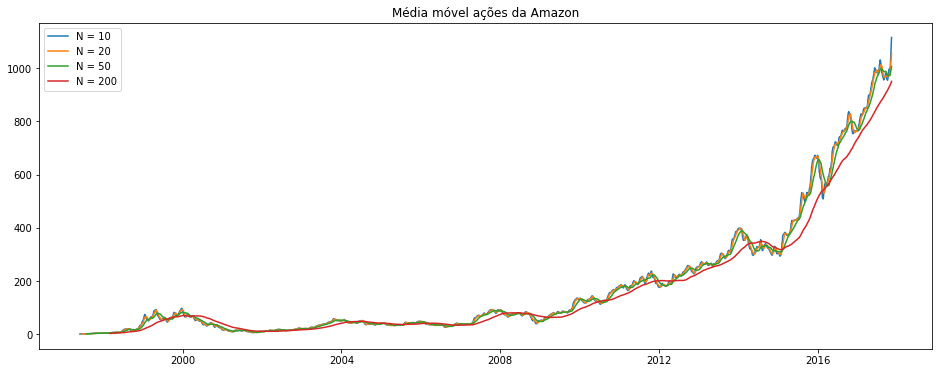

In [155]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da Amazon')
plt.plot(df_m10_amzn, label = 'N = 10')
plt.plot(df_m20_amzn, label = 'N = 20')
plt.plot(df_m50_amzn, label = 'N = 50')
plt.plot(df_m200_amzn, label = 'N = 200')
plt.legend()

In [107]:
# Facebook

df_m10_fb = mediamovel(df_fb, 10)
df_m20_fb = mediamovel(df_fb, 20)
df_m50_fb = mediamovel(df_fb, 50)
df_m200_fb = mediamovel(df_fb, 200)

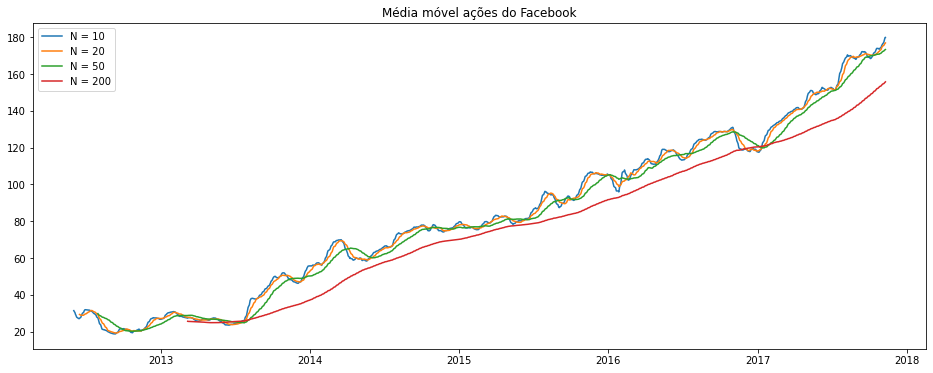

In [156]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações do Facebook')
plt.plot(df_m10_fb, label = 'N = 10')
plt.plot(df_m20_fb, label = 'N = 20')
plt.plot(df_m50_fb, label = 'N = 50')
plt.plot(df_m200_fb, label = 'N = 200')
plt.legend()

In [109]:
## medias moveis Oracle
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_orcl = mediamovel(df_orcl, 10)
df_m20_orcl = mediamovel(df_orcl, 20)
df_m50_orcl = mediamovel(df_orcl, 50)
df_m200_orcl = mediamovel(df_orcl, 200)

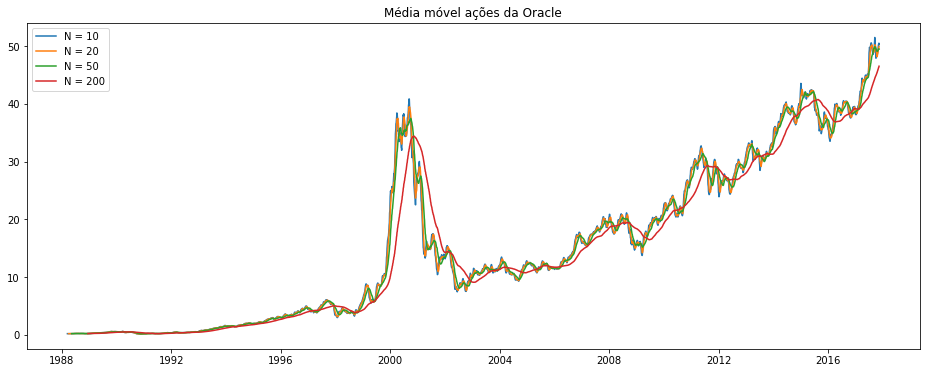

In [157]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da Oracle')
plt.plot(df_m10_orcl, label = 'N = 10')
plt.plot(df_m20_orcl, label = 'N = 20')
plt.plot(df_m50_orcl, label = 'N = 50')
plt.plot(df_m200_orcl, label = 'N = 200')
plt.legend()

In [118]:
## medias moveis Twitter
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_twtr = mediamovel(df_twtr, 10)
df_m20_twtr = mediamovel(df_twtr, 20)
df_m50_twtr = mediamovel(df_twtr, 50)
df_m200_twtr = mediamovel(df_twtr, 200)

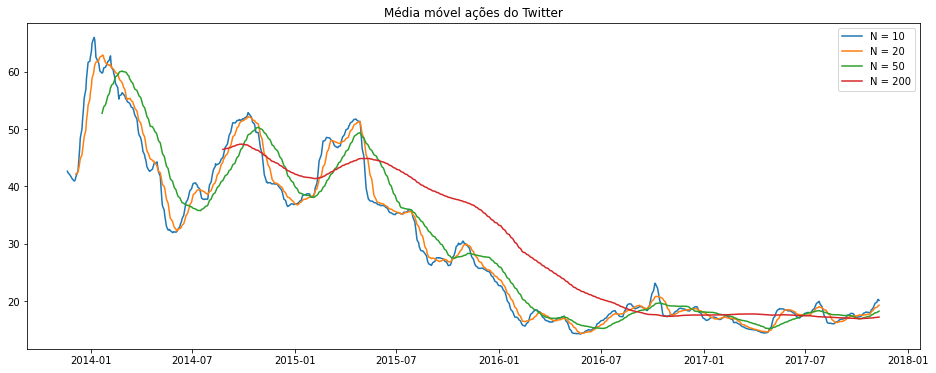

In [158]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações do Twitter')
plt.plot(df_m10_twtr, label = 'N = 10')
plt.plot(df_m20_twtr, label = 'N = 20')
plt.plot(df_m50_twtr, label = 'N = 50')
plt.plot(df_m200_twtr, label = 'N = 200')
plt.legend()

In [113]:
## medias moveis IBM
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_ibm = mediamovel(df_ibm, 10)
df_m20_ibm = mediamovel(df_ibm, 20)
df_m50_ibm = mediamovel(df_ibm, 50)
df_m200_ibm = mediamovel(df_ibm, 200)

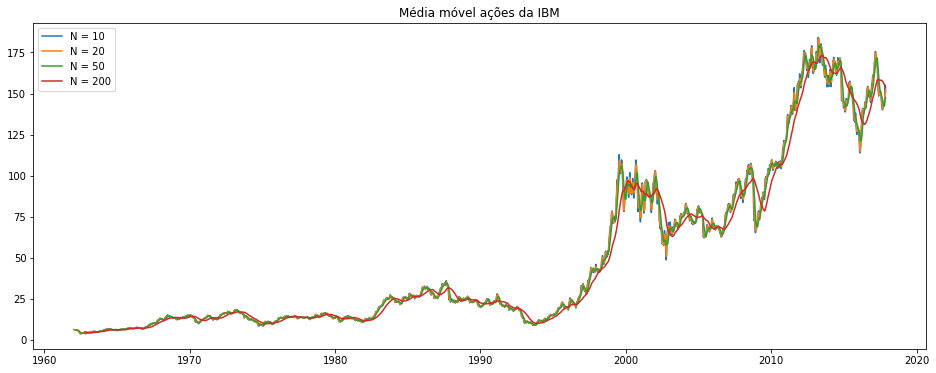

In [159]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da IBM')
plt.plot(df_m10_ibm, label = 'N = 10')
plt.plot(df_m20_ibm, label = 'N = 20')
plt.plot(df_m50_ibm, label = 'N = 50')
plt.plot(df_m200_ibm, label = 'N = 200')
plt.legend()

In [115]:
## medias moveis Walmart
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_wmt = mediamovel(df_wmt, 10)
df_m20_wmt = mediamovel(df_wmt, 20)
df_m50_wmt = mediamovel(df_wmt, 50)
df_m200_wmt = mediamovel(df_wmt, 200)

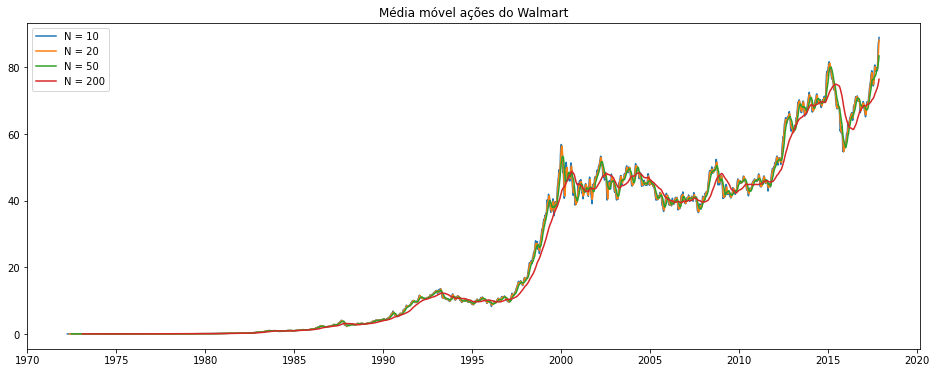

In [160]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações do Walmart')
plt.plot(df_m10_wmt, label = 'N = 10')
plt.plot(df_m20_wmt, label = 'N = 20')
plt.plot(df_m50_wmt, label = 'N = 50')
plt.plot(df_m200_wmt, label = 'N = 200')
plt.legend()

In [133]:
## medias moveis UnitedHealth
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_unh = mediamovel(df_unh, 10)
df_m20_unh = mediamovel(df_unh, 20)
df_m50_unh = mediamovel(df_unh, 50)
df_m200_unh = mediamovel(df_unh, 200)

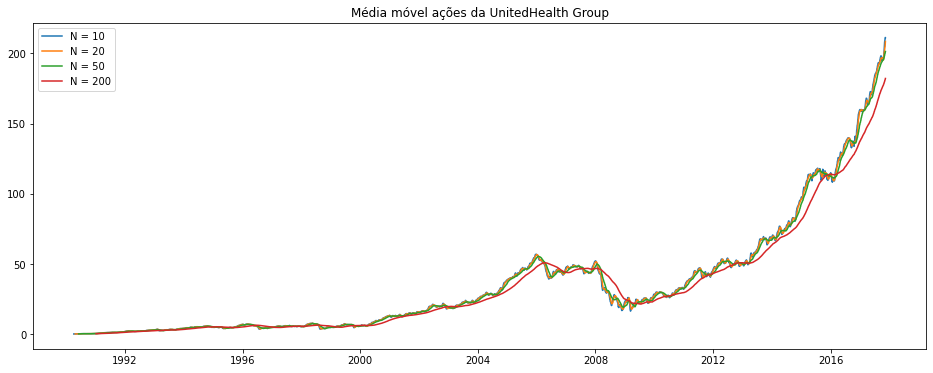

In [161]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da UnitedHealth Group')
plt.plot(df_m10_unh, label = 'N = 10')
plt.plot(df_m20_unh, label = 'N = 20')
plt.plot(df_m50_unh, label = 'N = 50')
plt.plot(df_m200_unh, label = 'N = 200')
plt.legend()

In [125]:
## medias moveis Netflix
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_nflx = mediamovel(df_nflx, 10)
df_m20_nflx = mediamovel(df_nflx, 20)
df_m50_nflx = mediamovel(df_nflx, 50)
df_m200_nflx = mediamovel(df_nflx, 200)

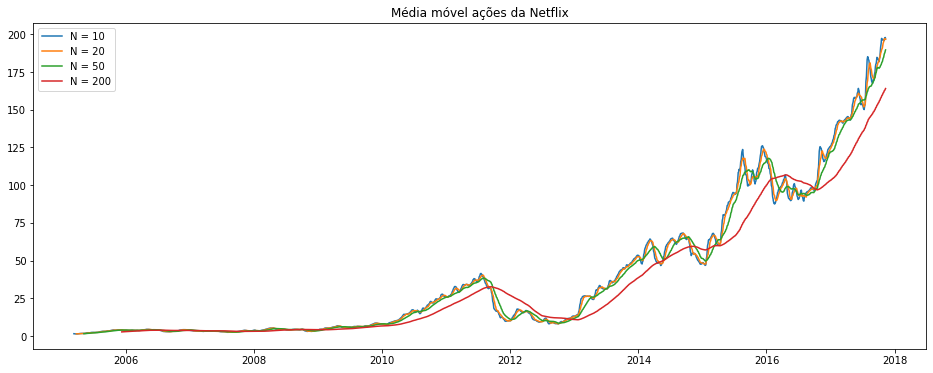

In [162]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da Netflix')
plt.plot(df_m10_nflx, label = 'N = 10')
plt.plot(df_m20_nflx, label = 'N = 20')
plt.plot(df_m50_nflx, label = 'N = 50')
plt.plot(df_m200_nflx, label = 'N = 200')
plt.legend()

In [127]:
## medias moveis Lifeway Foods
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_lway = mediamovel(df_lway, 10)
df_m20_lway = mediamovel(df_lway, 20)
df_m50_lway = mediamovel(df_lway, 50)
df_m200_lway = mediamovel(df_lway, 200)

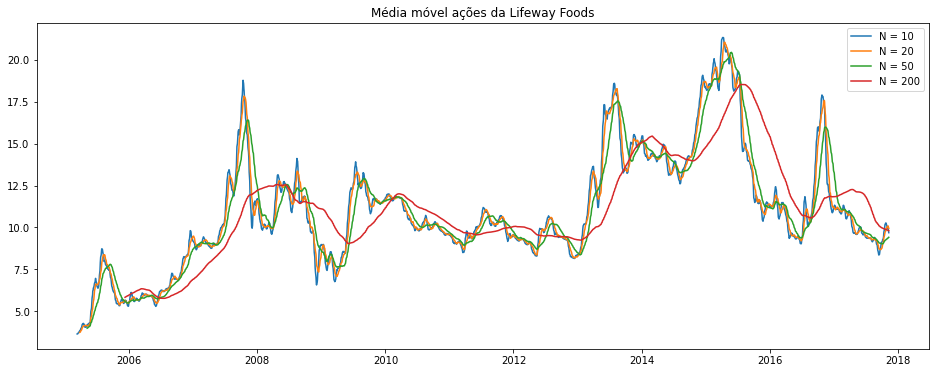

In [163]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da Lifeway Foods')
plt.plot(df_m10_lway, label = 'N = 10')
plt.plot(df_m20_lway, label = 'N = 20')
plt.plot(df_m50_lway, label = 'N = 50')
plt.plot(df_m200_lway, label = 'N = 200')
plt.legend()

In [131]:
## medias moveis NVIDIA
# notaçao: df_mXX_Y => XX: janela de tempo, Y: ação 

df_m10_nvda = mediamovel(df_nvda, 10)
df_m20_nvda = mediamovel(df_nvda, 20)
df_m50_nvda = mediamovel(df_nvda, 50)
df_m200_nvda = mediamovel(df_nvda, 200)

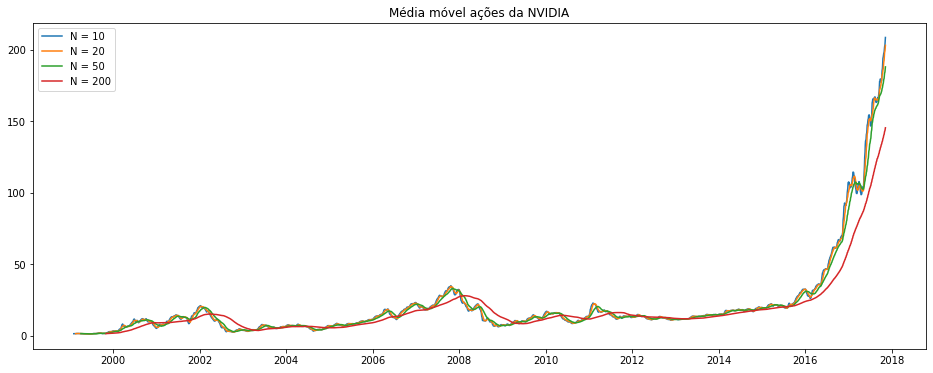

In [164]:
plt.figure(figsize = (16,6))
plt.title('Média móvel ações da NVIDIA')
plt.plot(df_m10_nvda, label = 'N = 10')
plt.plot(df_m20_nvda, label = 'N = 20')
plt.plot(df_m50_nvda, label = 'N = 50')
plt.plot(df_m200_nvda, label = 'N = 200')
plt.legend()

In [22]:
# Comentando os resultados:

# Temos que a média móvel nos dá uma tendência do comportamento de uma curva...

### Letra B

perguntar se é pra fazer a correlação das 10 ações escolhidas na letra A ou se é pra fazer com todas da pasta -> com as da letra A

In [3]:
df_pct_amzn = df_amzn['Close'].pct_change()
df_pct_fb = df_fb['Close'].pct_change()
df_pct_orcl = df_orcl['Close'].pct_change()
df_pct_twtr = df_twtr['Close'].pct_change()
df_pct_ibm = df_ibm['Close'].pct_change()
df_pct_wmt = df_wmt['Close'].pct_change()
df_pct_unh = df_unh['Close'].pct_change()
df_pct_nflx = df_nflx['Close'].pct_change()
df_pct_lway = df_lway['Close'].pct_change()
df_pct_nvda = df_nvda['Close'].pct_change()

In [4]:
df_close = pd.concat([df_pct_amzn, df_pct_fb, df_pct_orcl, df_pct_twtr, df_pct_ibm, 
                      df_pct_wmt, df_pct_unh, df_pct_nflx, df_pct_lway, df_pct_nvda], 
                     axis = 1)

In [5]:
# sns.scatterplot(x = df_pct_amzn, y = df_pct_nflx)

In [6]:
dict_corr = {}

lista_dfs = [df_pct_amzn, df_pct_fb, df_pct_orcl, df_pct_twtr, df_pct_ibm, 
            df_pct_wmt, df_pct_unh, df_pct_nflx, df_pct_lway, df_pct_nvda]
lista_cols = ['df_pct_amzn', 'df_pct_fb', 'df_pct_orcl', 'df_pct_twtr', 'df_pct_ibm', 
            'df_pct_wmt', 'df_pct_unh', 'df_pct_nflx', 'df_pct_lway', 'df_pct_nvda']


for i in range(len(lista_dfs)):
    dict_corr[f'{lista_cols[i]}'] = [lista_dfs[i].corr(lista_dfs[j]) for j in range(len(lista_dfs))]

In [21]:
df_correlacao = pd.DataFrame(dict_corr, index = lista_cols)
df_correlacao

,df_pct_amzn,df_pct_fb,df_pct_orcl,df_pct_twtr,df_pct_ibm,df_pct_wmt,df_pct_unh,df_pct_nflx,df_pct_lway,df_pct_nvda
df_pct_amzn,1.000000,0.335185,0.320723,0.203962,0.295417,0.235825,0.161248,0.326216,0.185399,0.285915
df_pct_fb,0.335185,1.000000,0.191802,0.268062,0.158794,0.075537,0.181328,0.183220,0.079178,0.200941
df_pct_orcl,0.320723,0.191802,1.000000,0.139095,0.373315,0.258145,0.204292,0.257252,0.242792,0.388618
df_pct_twtr,0.203962,0.268062,0.139095,1.000000,0.105676,0.068311,0.102051,0.214374,0.099795,0.177895
df_pct_ibm,0.295417,0.158794,0.373315,0.105676,1.000000,0.145484,0.190867,0.236542,0.232822,0.375082
df_pct_wmt,0.235825,0.075537,0.258145,0.068311,0.145484,1.000000,0.222012,0.178946,0.172705,0.172334
df_pct_unh,0.161248,0.181328,0.204292,0.102051,0.190867,0.222012,1.000000,0.199469,0.166099,0.145165
df_pct_nflx,0.326216,0.183220,0.257252,0.214374,0.236542,0.178946,0.199469,1.000000,0.100102,0.249414
df_pct_lway,0.185399,0.079178,0.242792,0.099795,0.232822,0.172705,0.166099,0.100102,1.000000,0.185020
df_pct_nvda,0.285915,0.200941,0.388618,0.177895,0.375082,0.172334,0.145165,0.249414,0.185020,1.000000


<AxesSubplot:>

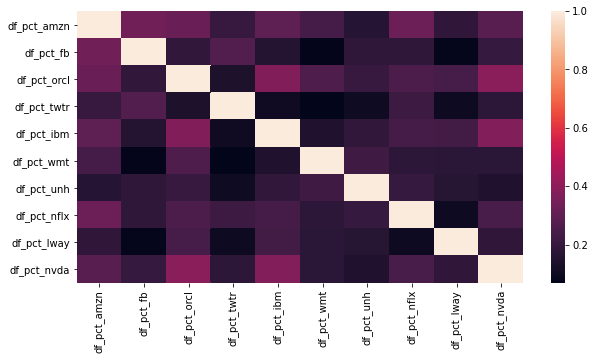

In [25]:
plt.figure(figsize = (10,5))
sns.heatmap(df_correlacao)

In [1]:
# Comentando resultados:

# A correlação foi feita tomando como base a porcentagem das variações das séries temporais.
# As ações escolhidas não estão muito correlacionadas.

# Os 5 pares de ações que possuem maior correlação são: NVIDIA e ORACLE, IBM e ORACLE, IBM e NVIDIA,
# FACEBOOK e AMAZON, e AMAZON e NETFLIX.
# Os pares que possuem menor correlação são: FACEBOOK e WALMART, FACEBOOK e LIFEWAY FOODS, NETFLIX e LIFEWAY FOODS,
# IBM e TWITTER, e TWITTER e UNITEDHEALTH GROUP.

### Letra C
perguntar se é só um modelo ou se são 4 (um para cada) -> um para cada, mas pode ser útil explorar ações correlacionadas no treinamento do modelo de cada uma.

In [83]:
# DataFrame das ações da Google (goog) contendo apenas a coluna Close, com a Data como indice
data_goog = pd.read_csv('./Stocks/goog.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Google (googl) contendo apenas a coluna Close, com a Data como indice
data_googl = pd.read_csv('./Stocks/googl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Apple (aapl) contendo apenas a coluna Close, com a Data como indice
data_aapl = pd.read_csv('./Stocks/aapl.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

# DataFrame das ações da Microsoft (msft) contendo apenas a coluna Close, com a Data como indice
data_msft = pd.read_csv('./Stocks/msft.us.txt', parse_dates = ['Date'], index_col = 'Date',
                     usecols = ['Date','Close'])

#### Ações da Google (goog)

In [3]:
data_goog.head()

,Close
Date,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


In [4]:
#scaler para normalizar
scaler_goog = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_goog = int(np.round(len(data_goog)*.8))

In [81]:
# numpy array com os preços de fechamento
dataset_goog = data_goog.values

In [6]:
data_goog.head()

,Close
Date,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


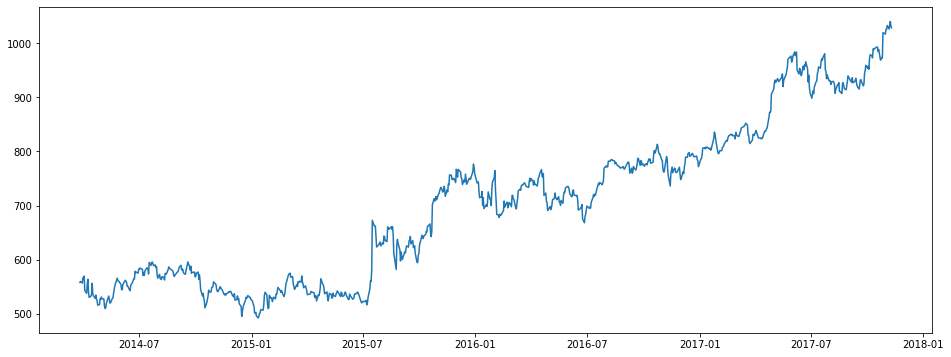

In [7]:
plt.figure(figsize = (16,6))
plt.plot(data_goog['Close'])

In [8]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_goog = scaler_goog.fit_transform(dataset_goog)

# Dividindo dados de treino e teste
train_goog = dataset_goog[0:train_data_len_goog]
test_goog = dataset_goog[train_data_len_goog:len(data_goog)]

In [9]:
#Preenchendo variaveis de treino
X_train_goog = []
y_train_goog = []
steps_goog = 40

for i in range(steps_goog,len(train_goog)):
    X_train_goog.append(scaled_data_goog[i - steps_goog:i, 0])
    y_train_goog.append(scaled_data_goog[i, 0])

# transformando em um numpy array
X_train_goog = np.array(X_train_goog)
y_train_goog = np.array(y_train_goog)

X_train_goog = np.reshape(X_train_goog, (X_train_goog.shape[0],X_train_goog.shape[1],1))

In [10]:
X_train_goog.shape

(693, 40, 1)

In [11]:
y_train_goog.shape

(693,)

In [12]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_goog = Sequential()
model_goog.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_goog.shape[1],1)))
model_goog.add(LSTM(units = neuronios_oculta))
model_goog.add(Dense(units = neuronios_saida))

In [13]:
# Compilando o modelo
model_goog.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Treinando modelo
model_goog.fit(X_train_goog, y_train_goog, epochs = 10, batch_size = 32)

Epoch 1/10
22/22 [==============================] - 3s 23ms/step - loss: 0.0562
Epoch 2/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0049
Epoch 3/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0017
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0012
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0014
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0013
Epoch 7/10
22/22 [==============================] - 0s 22ms/step - loss: 0.0012
Epoch 8/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 9/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 10/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0011


In [15]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs = data_goog[len(data_goog) - len(test_goog) - steps_goog:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler_goog.transform(inputs)

In [16]:
#preenchendo variavel de teste
X_test_goog = []
for i in range(steps_goog,inputs.shape[0]):
    X_test_goog.append(inputs[i - steps_goog:i,0])
X_test_goog = np.array(X_test_goog)

In [17]:
#fazendo predições
X_test_goog = np.reshape(X_test_goog, (X_test_goog.shape[0],X_test_goog.shape[1],1))
close_goog = model_goog.predict(X_test_goog)
close_goog = scaler_goog.inverse_transform(close_goog)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


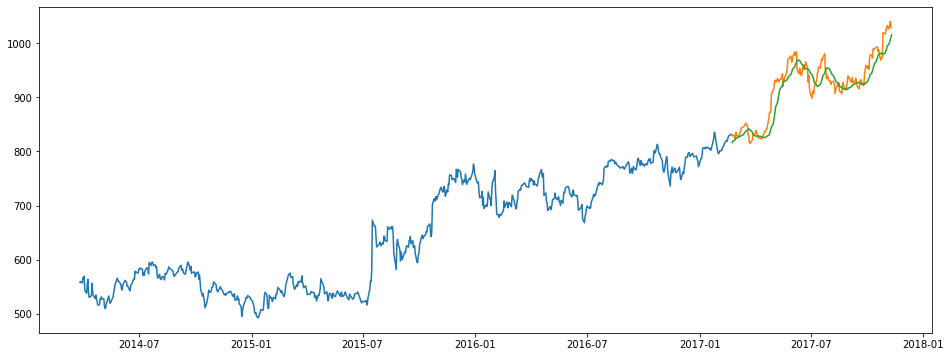

In [18]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino = data_goog[0:train_data_len_goog]
curva_teste = data_goog[train_data_len_goog:len(data_goog)]
curva_teste['Predictions'] = close_goog

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino['Close'])
plt.plot(curva_teste[['Close','Predictions']])

#### Ações da Google (googl)

In [24]:
data_googl.head()

,Close
Date,
2004-08-19,50.170
2004-08-20,54.155
2004-08-23,54.700
2004-08-24,52.435
2004-08-25,53.000


In [26]:
#scaler para normalizar
scaler_googl = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_googl = int(np.round(len(data_googl)*.8))

In [80]:
# numpy array com os preços de fechamento
dataset_googl = data_googl.values

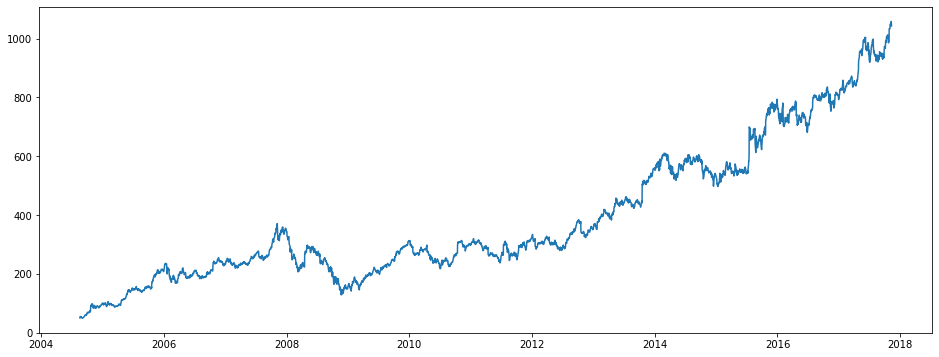

In [28]:
plt.figure(figsize = (16,6))
plt.plot(data_googl['Close'])

In [29]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_googl = scaler_googl.fit_transform(dataset_googl)

# Dividindo dados de treino e teste
train_googl = dataset_googl[0:train_data_len_googl]
test_googl = dataset_googl[train_data_len_googl:len(data_googl)]

In [30]:
#Preenchendo variaveis de treino
X_train_googl = []
y_train_googl = []
steps_googl = 60

for i in range(steps_googl,len(train_googl)):
    X_train_googl.append(scaled_data_googl[i - steps_googl:i,0])
    y_train_googl.append(scaled_data_googl[i,0])

# transformando em um numpy array
X_train_googl = np.array(X_train_googl)
y_train_googl = np.array(y_train_googl)

X_train_googl = np.reshape(X_train_googl, (X_train_googl.shape[0],X_train_googl.shape[1],1))

In [31]:
X_train_googl.shape

(2606, 60, 1)

In [32]:
y_train_googl.shape

(2606,)

In [33]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_googl = Sequential()
model_googl.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_googl.shape[1],1)))
model_googl.add(LSTM(units = neuronios_oculta))
model_googl.add(Dense(units = neuronios_saida))

In [34]:
# Compilando o modelo
model_googl.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Treinando modelo
model_googl.fit(X_train_googl, y_train_googl, epochs = 10, batch_size = 64)

Epoch 1/10
41/41 [==============================] - 4s 38ms/step - loss: 0.0161
Epoch 2/10
41/41 [==============================] - 2s 50ms/step - loss: 3.0655e-04
Epoch 3/10
41/41 [==============================] - 2s 40ms/step - loss: 1.6174e-04
Epoch 4/10
41/41 [==============================] - 2s 38ms/step - loss: 1.5884e-04
Epoch 5/10
41/41 [==============================] - 2s 49ms/step - loss: 1.5534e-04
Epoch 6/10
41/41 [==============================] - 2s 45ms/step - loss: 1.5510e-04
Epoch 7/10
41/41 [==============================] - 2s 39ms/step - loss: 1.4887e-04
Epoch 8/10
41/41 [==============================] - 2s 46ms/step - loss: 1.4300e-04
Epoch 9/10
41/41 [==============================] - 2s 51ms/step - loss: 1.4341e-04
Epoch 10/10
41/41 [==============================] - 2s 53ms/step - loss: 1.4750e-04


In [36]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_googl = data_googl[len(data_googl) - len(test_googl) - steps_googl:].values
inputs_googl = inputs_googl.reshape(-1,1)
inputs_googl  = scaler_googl.transform(inputs_googl)

In [37]:
#preenchendo variavel de teste
X_test_googl = []
for i in range(steps_googl,inputs_googl.shape[0]):
    X_test_googl.append(inputs_googl[i - steps_googl:i,0])
X_test_googl = np.array(X_test_googl)

In [38]:
#fazendo predições
X_test_googl = np.reshape(X_test_googl, (X_test_googl.shape[0],X_test_googl.shape[1],1))
close_googl = model_googl.predict(X_test_googl)
close_googl = scaler_googl.inverse_transform(close_googl)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


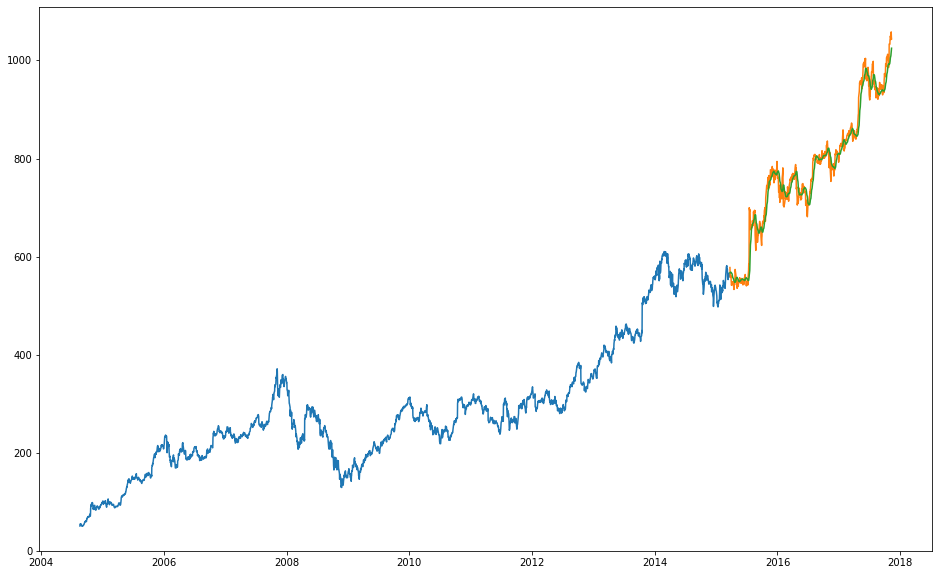

In [101]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino_googl = data_googl[0:train_data_len_googl]
curva_teste_googl = data_googl[train_data_len_googl:len(data_googl)]
curva_teste_googl['Predictions'] = close_googl

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,10))
plt.plot(curva_treino_googl['Close'])
plt.plot(curva_teste_googl[['Close','Predictions']])

#### Ações da Apple (aapl)

In [79]:
data_aapl.head()

,Close
Date,
1984-09-07,0.42388
1984-09-10,0.42134
1984-09-11,0.42902
1984-09-12,0.41618
1984-09-13,0.43927


In [42]:
#scaler para normalizar
scaler_aapl = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_aapl = int(np.round(len(data_aapl)*.8))

In [78]:
# numpy array com os preços de fechamento
dataset_aapl = data_aapl.values

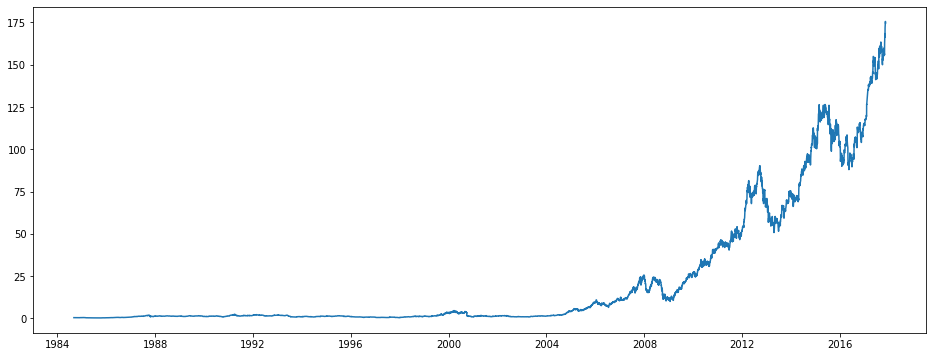

In [45]:
plt.figure(figsize = (16,6))
plt.plot(data_aapl['Close'])

In [47]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_aapl = scaler_aapl.fit_transform(dataset_aapl)

# Dividindo dados de treino e teste
train_aapl = dataset_aapl[0:train_data_len_aapl]
test_aapl = dataset_aapl[train_data_len_aapl:len(data_aapl)]

In [48]:
#Preenchendo variaveis de treino
X_train_aapl = []
y_train_aapl = []
steps_aapl = 60

for i in range(steps_aapl,len(train_aapl)):
    X_train_aapl.append(scaled_data_aapl[i - steps_aapl:i,0])
    y_train_aapl.append(scaled_data_aapl[i,0])

# transformando em um numpy array
X_train_aapl = np.array(X_train_aapl)
y_train_aapl = np.array(y_train_aapl)

X_train_aapl = np.reshape(X_train_aapl, (X_train_aapl.shape[0],X_train_aapl.shape[1],1))

In [49]:
X_train_aapl.shape

(6631, 60, 1)

In [50]:
y_train_aapl.shape

(6631,)

In [51]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_aapl = Sequential()
model_aapl.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_aapl.shape[1],1)))
model_aapl.add(LSTM(units = neuronios_oculta))
model_aapl.add(Dense(units = neuronios_saida))

In [52]:
# Compilando o modelo
model_aapl.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
# Treinando modelo
model_aapl.fit(X_train_aapl, y_train_aapl, epochs = 10, batch_size = 64)

Epoch 1/10
104/104 [==============================] - 8s 54ms/step - loss: 4.7948e-04
Epoch 2/10
104/104 [==============================] - 5s 52ms/step - loss: 1.0887e-05
Epoch 3/10
104/104 [==============================] - 6s 59ms/step - loss: 1.0010e-05
Epoch 4/10
104/104 [==============================] - 6s 53ms/step - loss: 9.3750e-06
Epoch 5/10
104/104 [==============================] - 6s 57ms/step - loss: 8.0157e-06
Epoch 6/10
104/104 [==============================] - 6s 55ms/step - loss: 8.3085e-06
Epoch 7/10
104/104 [==============================] - 6s 54ms/step - loss: 8.0092e-06
Epoch 8/10
104/104 [==============================] - 6s 60ms/step - loss: 6.9642e-06
Epoch 9/10
104/104 [==============================] - 6s 57ms/step - loss: 6.4887e-06
Epoch 10/10
104/104 [==============================] - 7s 70ms/step - loss: 6.7961e-06


In [54]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_aapl = data_aapl[len(data_aapl) - len(test_aapl) - steps_aapl:].values
inputs_aapl = inputs_aapl.reshape(-1,1)
inputs_aapl  = scaler_aapl.transform(inputs_aapl)

In [55]:
#preenchendo variavel de teste
X_test_aapl = []
for i in range(steps_aapl, inputs_aapl.shape[0]):
    X_test_aapl.append(inputs_aapl[i - steps_aapl:i,0])
X_test_aapl = np.array(X_test_aapl)

In [56]:
#fazendo predições
X_test_aapl = np.reshape(X_test_aapl, (X_test_aapl.shape[0],X_test_aapl.shape[1],1))
close_aapl = model_aapl.predict(X_test_aapl)
close_aapl = scaler_aapl.inverse_transform(close_aapl)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


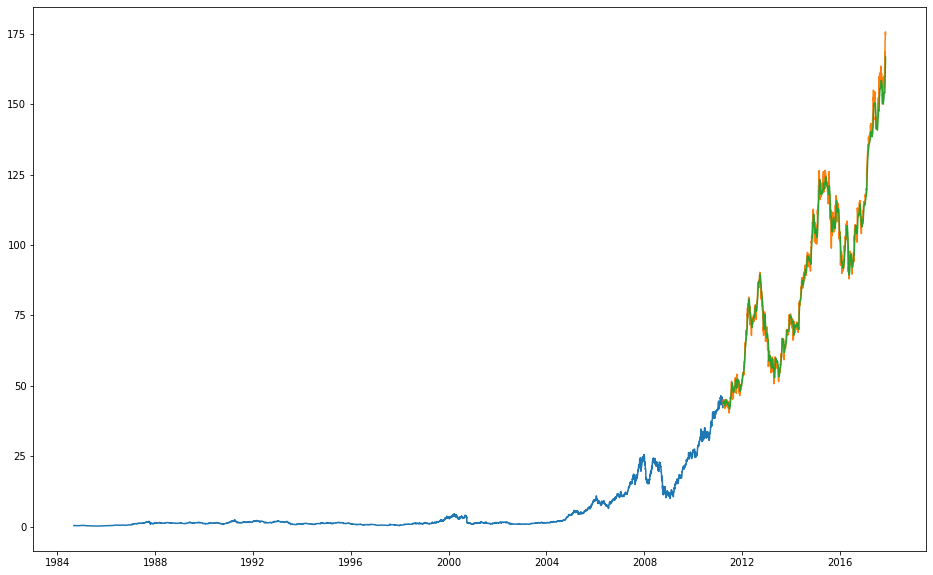

In [102]:
# Plotar grafico

#dataframe com os dados de treino e teste

curva_treino_aapl = data_aapl[0:train_data_len_aapl]
curva_teste_aapl = data_aapl[train_data_len_aapl:len(data_aapl)]
curva_teste_aapl['Predictions'] = close_aapl

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,10))
plt.plot(curva_treino_aapl['Close'])
plt.plot(curva_teste_aapl[['Close','Predictions']])

#### Ações da Microsoft (msft)

In [77]:
data_msft.head()

,Close
Date,
1986-03-13,0.07533
1986-03-14,0.07533
1986-03-17,0.07533
1986-03-18,0.07533
1986-03-19,0.07533


In [62]:
#scaler para normalizar
scaler_msft = MinMaxScaler(feature_range=(0, 1))

# definindo length dos dados de treino
train_data_len_msft = int(np.round(len(data_msft)*.8))

In [76]:
# numpy array com os preços de fechamento
dataset_msft = data_msft.values

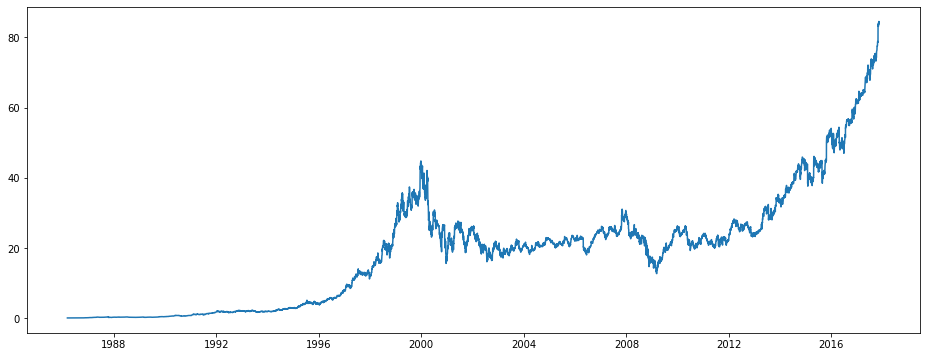

In [64]:
plt.figure(figsize = (16,6))
plt.plot(data_msft['Close'])

In [65]:
# Normalizando os preços de fechamento para poder fazer o modelo
scaled_data_msft = scaler_msft.fit_transform(dataset_msft)

# Dividindo dados de treino e teste
train_msft = dataset_msft[0:train_data_len_msft]
test_msft = dataset_msft[train_data_len_msft:len(data_msft)]

In [66]:
#Preenchendo variaveis de treino
X_train_msft = []
y_train_msft = []
steps_msft = 60

for i in range(steps_msft,len(train_msft)):
    X_train_msft.append(scaled_data_msft[i - steps_msft:i,0])
    y_train_msft.append(scaled_data_msft[i,0])

# transformando em um numpy array
X_train_msft = np.array(X_train_msft)
y_train_msft = np.array(y_train_msft)

X_train_msft = np.reshape(X_train_msft, (X_train_msft.shape[0],X_train_msft.shape[1],1))

In [67]:
X_train_msft.shape

(6326, 60, 1)

In [68]:
y_train_msft.shape

(6326,)

In [69]:
# Criando modelo

entradas = 1
neuronios_oculta = 50
neuronios_saida = 1

model_msft = Sequential()
model_msft.add(LSTM(units = neuronios_oculta, return_sequences = True ,input_shape = (X_train_msft.shape[1],1)))
model_msft.add(LSTM(units = neuronios_oculta))
model_msft.add(Dense(units = neuronios_saida))

In [70]:
# Compilando o modelo
model_msft.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
# Treinando modelo
model_msft.fit(X_train_msft, y_train_msft, epochs = 10, batch_size = 64)

Epoch 1/10
99/99 [==============================] - 8s 50ms/step - loss: 0.0070
Epoch 2/10
99/99 [==============================] - 5s 55ms/step - loss: 1.1594e-04
Epoch 3/10
99/99 [==============================] - 6s 56ms/step - loss: 1.1195e-04
Epoch 4/10
99/99 [==============================] - 6s 56ms/step - loss: 1.0071e-04: 0s
Epoch 5/10
99/99 [==============================] - 6s 57ms/step - loss: 1.0499e-04
Epoch 6/10
99/99 [==============================] - 6s 56ms/step - loss: 8.6283e-05: 0s -
Epoch 7/10
99/99 [==============================] - 5s 55ms/step - loss: 9.0431e-05
Epoch 8/10
99/99 [==============================] - 6s 57ms/step - loss: 8.2510e-05
Epoch 9/10
99/99 [==============================] - 5s 55ms/step - loss: 7.2964e-05
Epoch 10/10
99/99 [==============================] - 6s 57ms/step - loss: 6.6166e-05


In [72]:
#testando o modelo

#definindo array com os dados de teste a serem testados
inputs_msft = data_msft[len(data_msft) - len(test_msft) - steps_msft:].values
inputs_msft = inputs_msft.reshape(-1,1)
inputs_msft  = scaler_msft.transform(inputs_msft)

In [73]:
#preenchendo variavel de teste
X_test_msft = []
for i in range(steps_msft, inputs_msft.shape[0]):
    X_test_msft.append(inputs_msft[i - steps_msft:i,0])
X_test_msft = np.array(X_test_msft)

In [74]:
#fazendo predições
X_test_msft = np.reshape(X_test_msft, (X_test_msft.shape[0],X_test_msft.shape[1],1))
close_msft = model_msft.predict(X_test_msft)
close_msft = scaler_msft.inverse_transform(close_msft)

c:\users\andre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


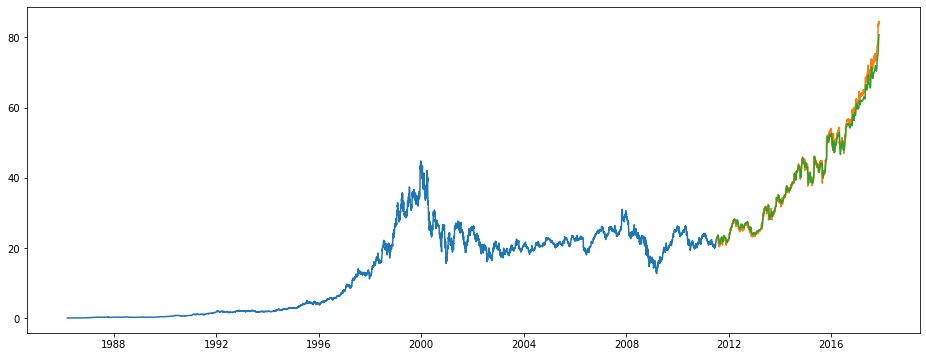

In [75]:
# Plotar grafico

#dataframe com os dados de treino e teste
curva_treino_msft = data_msft[0:train_data_len_msft]
curva_teste_msft = data_msft[train_data_len_msft:len(data_msft)]
curva_teste_msft['Predictions'] = close_msft

#plotando gráfico comparando os resultados da predição e os dados reais
#o resultado da predição é a curva de cor verde
plt.figure(figsize = (16,6))
plt.plot(curva_treino_msft['Close'])
plt.plot(curva_teste_msft[['Close','Predictions']])